# Perceptron

In [170]:
import random
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Load data

In [85]:
iris = pd.read_csv('data/Iris.txt', header=None)
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# replace species with a shorter version
iris.replace("Iris-setosa", "setosa", inplace=True)
iris.replace("Iris-versicolor", "versicolor", inplace=True)
iris.replace("Iris-virginica", "virginica", inplace=True)

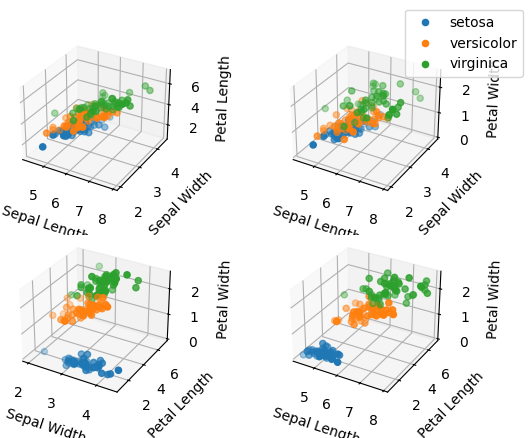

In [ ]:
setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species == "versicolor"]
virginica = iris[iris.species == "virginica"]

fig = plt.figure()
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

for df in [setosa, versicolor, virginica]:
    lbl = np.unique(df.species.values)[0]
    ax1.scatter(df.sepal_length, df.sepal_width, df.petal_length, label=lbl)
    ax2.scatter(df.sepal_length, df.sepal_width, df.petal_width, label=lbl)
    ax3.scatter(df.sepal_width, df.petal_length, df.petal_width, label=lbl)
    ax4.scatter(df.sepal_length, df.petal_length, df.petal_width, label=lbl)
    
ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Sepal Width")
ax1.set_zlabel("Petal Length")

ax2.legend(bbox_to_anchor=(0.7, 0.7))
ax2.set_xlabel("Sepal Length")
ax2.set_ylabel("Sepal Width")
ax2.set_zlabel("Petal Width")
    
ax3.set_xlabel("Sepal Width")
ax3.set_ylabel("Petal Length")
ax3.set_zlabel("Petal Width")

ax4.set_xlabel("Sepal Length")
ax4.set_ylabel("Petal Length")
ax4.set_zlabel("Petal Width")
plt.show()

Setosa is clearly linearly separable from versicolor and virginica, so we could employ a simple perceptron to find the decision boundary for this classification task.

## Perceptron implementation

In [218]:
# let setosa be 1, and virginica and versicolor be -1
def fixedPerceptron(Arr, Weights, beta, cls, epochs=10, offline=False):
    """Simple perceptron with fixed increment learning.

    Parameters
    ----------
    Arr : numpy.ndarray
        _description_
    Weights : numpy.ndarray
        _description_
    beta : float
        Learning rate of the perceptron. 0 < beta < 1.
    cls : _type_
        _description_
    epochs : int, optional
        _description_, by default 10
    offline : bool, optional
        _description_, by default False

    Returns
    -------
    _type_
        _description_
    """
    total_samples = np.size(Arr, 0)

    # create empty array to store errors
    epoch_errors = np.empty(epochs)

    for epoch in range(epochs):
        E = 0
        for i in range(total_samples):
            # current classification
            z = np.sign(np.dot(Weights.T, Arr[i, 0:5]))

            # target classification
            if Arr[i, 5] == cls:
                T = 1
            else:
                T = -1

            # calculate trial error
            e = T - z

            # update weights
            Weights = Weights + beta * np.sign(e) * Arr[i, 0:5]

            # update error
            E += int(e != 0)
    
        epoch_errors[epoch] = E
        
    return epoch_errors, Weights

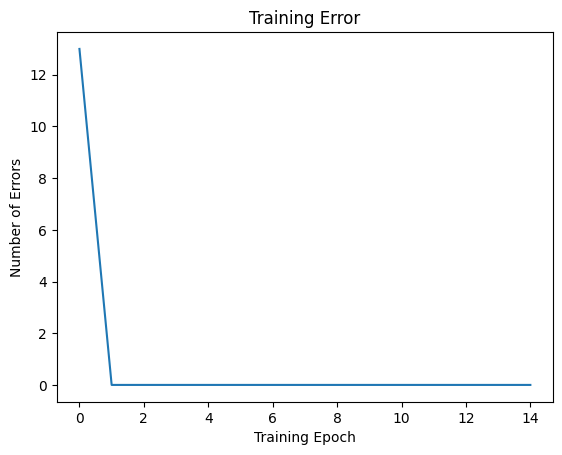

In [238]:
data = iris.to_numpy()
data = np.insert(data, 4, np.ones(np.size(data, 0)), axis=1)

initial_weights = np.random.rand(np.size(data, 1) - 1)
np.random.shuffle(data)

error, weights = fixedPerceptron(data, initial_weights, 0.01, "setosa", epochs=15)
    
plt.figure()
plt.plot(error)
plt.xlabel("Training Epoch")
plt.ylabel("Number of Errors")
plt.title("Training Error")
plt.show()

Now that we've trained the perceptron, it's time to test whether it can accurately classify the species.

In [239]:
# reshuffle the data
np.random.shuffle(data)

# initialize empty array
classif = np.empty(np.size(data, 0))
for i in range(np.size(data, 0)):
    classif[i] = int(np.sign(np.dot(weights.T, data[i,0:5])))

# append prediction array to data
classified_data = np.append(data, classif[:,None],1)

classA = classified_data[classified_data[:,6] == 1]
classB = classified_data[classified_data[:,6] == -1]

### Plot decision boundary
This time, we'll plot in 2D for easier visual assessment.

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

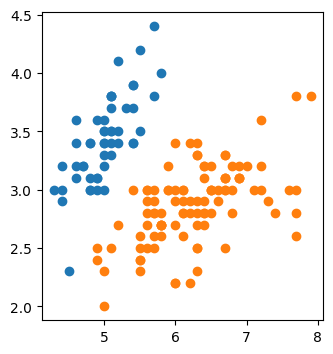

In [282]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

# plot the first two features
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), 
                     np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]
zz = np.dot(grid, weights[:2])
zz = zz.reshape(xx.shape)
# zz = (-weights[0]*xx - weights[1]*yy - weights[4])*1.0 / weights[2]

for ii in [classA, classB]:
    lbl = np.unique(ii[:,6])
    if lbl == 1:
        lbl = "setosa"
    elif lbl == -1:
        lbl = "versicolor/virginica"
    ax1.scatter(x=ii[:, 0], y=ii[:, 1], label=lbl)
        
ax1.contourf(xx, yy, zz, alpha=0.2)
ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Sepal Width")
# ax1.set_zlabel("Petal Length")

xx,yy = np.meshgrid(range(1,9),range(1,9))
# zz = (-weights[1]*xx - weights[2]*yy - weights[4])*1.0 / weights[3]

ax2 = fig.add_subplot(122)
for ii in [classA, classB]:
    lbl = np.unique(ii[:,6])
    if lbl == 1:
        lbl = "Iris setosa"
    elif lbl == -1:
        lbl = "Iris versicolor/virginica"
    ax2.scatter(x=np.asarray(ii[:,1],dtype="float"),y=np.asarray(ii[:,2],dtype="float"),label=lbl)
        
ax2.contourf(xx,yy,zz,alpha=0.2)
plt.legend(bbox_to_anchor=(0.4, 1))
ax2.set_xlabel("Sepal Length")
ax2.set_ylabel("Sepal Width")
# ax2.set_zlabel("Petal Length")
plt.show()

## 1.3 Learning Rate & Convergence
To investigate how the learning rate impacts convergence speed, we will keep our previous starting weights.

In [ ]:
LR = [0.0005, 0.001, 0.01, 0.01, 0.1, 0.3]

np.random.shuffle(data)
test = data

plt.figure()
for i in range(len(LR)):
    ax = plt.subplot(3,2,i+1)
    error,weights = fixedPerceptron(train,w,LR[i],"A")

    ax.plot(error)
    plt.xlabel("Training Epoch")
    plt.ylabel("Number of Errors")
    plt.title("LR = "+str(LR[i]))
plt.tight_layout()

It seems that the algorithm reaches perfect classification after one time through the entire data set no matter the learning rate. This might be because the data is so well separated that a simple perceptron reaches the solution quickly. We can see that, with a learning rate of 0.0005 (extremely small), the perceptron does take more time to converge.

## 1.4 Absolute correction procedure

In [ ]:
# let Class A be 1, Class B & C be -1
def variablePerceptron(x,w,beta,cls,epochs=50):
    
    # create empty array to store errors
    Error = np.empty(epochs)
        
    for j in range(epochs):
        E = 0
        for i in range(np.size(x,0)):

            # classify
            z = np.sign(np.dot(w.T,x[i,:5]))

            # desired output
            if x[i,5] == cls:
                T = 1
            else:
                T = -1

            # calculate error
            e = T - z

            # absolute error correction
            if e != 0:
                beta = np.dot(w.T,x[i,:5])/(np.dot(x[i,:5].T,x[i,:5]))

                # update weights
                w = w - beta*x[i,:5]

            E = E + int(e != 0)
                
        Error[j] = E
            
    return Error,w

In [ ]:
weights = np.random.rand(np.size(data,1)-1)

error,weights = variablePerceptron(train,weights,0,"A")

plt.figure()
plt.plot(error)
plt.xlabel("Training Epoch")
plt.ylabel("Number of Errors")

In [ ]:
np.random.shuffle(data)
test = data

classif = np.empty(np.size(test,0))
for i in range(np.size(test,0)):
    classif[i] = int(np.sign(np.dot(wts.T,test[i,0:5])))

out = np.append(test,classif[:,None],1)

A = out[out[:,6]==1]
B = out[out[:,6]==-1]

In [ ]:
xx,yy = np.meshgrid(range(1,9),range(1,9))
zz = (-wts[0]*xx - wts[1]*yy - wts[4])*1.0 / wts[2]

fig = plt.figure()
ax = Axes3D(fig)
for ii in [A,B]:
    lbl = np.unique(ii[:,6])
    if lbl == 1:
        lbl = "Iris setosa"
    elif lbl == -1:
        lbl = "Iris versicolor/virginica"
    ax.scatter(xs=np.asarray(ii[:,0],dtype="float"),ys=np.asarray(ii[:,1],dtype="float"),zs=np.asarray(ii[:,2],dtype="float"),label=lbl)
        
ax.plot_surface(xx,yy,zz,alpha=0.2)
plt.legend(loc=2)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
plt.show()